In [39]:
import sys
sys.path.append("..")

from app.analyzer import analyze_entry
from app.storage import save_entry, load_entries

In [41]:
journal_text = """
I’ve been feeling overwhelmed by the pace of work lately. Even when I finish something, the to-do list just keeps growing. 
I know I should be proud of what I accomplish, but I can't help feeling like I'm falling short.
"""


In [43]:
result = analyze_entry(journal_text)
save_entry(journal_text, result)


✅ Entry saved at 2025-06-01T23:51:44.313319


In [44]:
entries = load_entries()
entries[-1]


{'text': "\nI’ve been feeling overwhelmed by the pace of work lately. Even when I finish something, the to-do list just keeps growing. \nI know I should be proud of what I accomplish, but I can't help feeling like I'm falling short.\n",
 'analysis': {'summary': 'Feeling overwhelmed by the pace of work which never seems to end.',
  'emotions': ['Overwhelmed', 'Disappointment'],
  'patterns': ['Catastrophizing', 'Self-Blame', 'Comparison'],
  'themes': ['Work Stress'],
  'ai_thoughts': "Okay, so I need to analyze this journal entry and figure out the summary, emotions, cognitive distortions, and core themes. Let me read it carefully.\n\nThe person says they're overwhelmed by the pace of work. Even after finishing something, the list keeps growing. They know they should be proud but feel like they're falling short.\n\nFirst, summarizing: The main point is feeling overwhelmed with work tasks that never seem to end.\n\nEmotions: Overwhelmed and disappointment make sense because they can't f

In [ ]:
from app.storage import load_entries

entries = load_entries()

# Find the entry by keyword (e.g., 'new Journal')
for i, e in enumerate(reversed(entries)):
    if "new Journal" in e["text"]:
        print(f"Found at index: {-1 - i}")
        print(e["text"])
        break


In [ ]:
entry = entries[-2]
print("📝 Text:\n", entry["text"])
print("🧠 Summary:\n", entry["summary"])
print("🧾 Raw Output:\n", entry.get("raw_output", "No raw output found"))


In [ ]:
from app.analyzer import analyze_entry

In [ ]:
result = analyze_entry(entry['text'])


In [ ]:
result

In [ ]:
# generate_realistic_journals.py
# Uses DeepSeek (via Ollama) to create 150 diverse journal entries

import json
import random
import time
from datetime import datetime, timedelta
import requests

# Constants
OLLAMA_URL = "http://localhost:11434/api/chat"
MODEL_NAME = "deepseek-r1"
OUTPUT_PATH = "/Users/Additional Storage/ML Projects/Journal app/data/generated_deepseek_entries.jsonl"

# Emotion/theme seeds for diversity
emotions_pool = [
    "anxiety", "joy", "loneliness", "hope", "confusion", "pride", "grief", "boredom", "motivation",
    "excitement", "fear", "regret", "curiosity", "burnout", "peace"
]
topics_pool = [
    "relationships", "work stress", "family dynamics", "career growth", "mental health", "self-discovery",
    "routine fatigue", "health journey", "romantic feelings", "loss", "uncertainty about future",
    "celebrating a win", "dealing with rejection", "spiritual questioning"
]

# Prompt to generate realistic journal text
ENTRY_GENERATION_PROMPT = """
You're a human writing a private journal.
Your tone should be raw, informal, and personal.
Write a journal entry about feeling {emotion} today, with thoughts related to {topic}.
Include emotion, thought loops, and sensory detail if helpful.
Keep it between 4–8 sentences.
Do not include headings or lists.
Just return the journal text.
"""

import re

# Generate a single journal text from deepseek
def generate_journal_text(emotion, topic):
    payload = {
        "model": MODEL_NAME,
        "messages": [
            {"role": "system", "content": "You are a human journaling assistant."},
            {"role": "user", "content": ENTRY_GENERATION_PROMPT.format(emotion=emotion, topic=topic)}
        ],
        "stream": False
    }
    try:
        response = requests.post(OLLAMA_URL, json=payload)
        raw = response.json()["message"]["content"].strip()
        cleaned = re.sub(r"<think>.*?</think>", "", raw, flags=re.DOTALL).strip()
        return cleaned
    except Exception as e:
        print(f"❌ Failed to generate entry for {emotion} + {topic}: {e}")
        return None

# Generate realistic timestamp
def random_timestamp(start_year=2024, end_year=2025):
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)
    total_days = (end_date - start_date).days
    random_days = random.randint(0, total_days)
    random_seconds = random.randint(0, 86400)
    return (start_date + timedelta(days=random_days, seconds=random_seconds)).isoformat()

# Generate entries and save
entries = []
combos = list(set((e, t) for e in emotions_pool for t in topics_pool))
random.shuffle(combos)

total = 2
print(f"🧠 Generating {total} entries via DeepSeek…")

for i in range(total):
    emotion, topic = combos[i % len(combos)]
    text = generate_journal_text(emotion, topic)
    if not text:
        continue

    entry = {
        "timestamp": random_timestamp(),
        "text": text,
        "summary": "",  # To be filled by your analyzer
        "emotions": [],
        "patterns": [],
        "themes": [],
        "ai_thoughts": "",
        "raw_output": ""
    }
    entries.append(entry)
    print(f"✅ {i+1}/{total}: {emotion}, {topic}")
    time.sleep(1.5)  # Optional pacing if DeepSeek needs time

# Save to .jsonl
with open(OUTPUT_PATH, "w") as f:
    for entry in entries:
        f.write(json.dumps(entry) + "\n")

print(f"\n✅ Done. Saved {len(entries)} entries to: {OUTPUT_PATH}")


In [ ]:
entries = []

with open(OUTPUT_PATH, "r") as f:
    for line in f:
        entries.append(json.loads(line.strip()))

# Now you can access individual ones like:
print(entries[0]["text"])


In [ ]:
entries = []

with open(OUTPUT_PATH, "r") as f:
    for line in f:
        entries.append(json.loads(line.strip()))

# Now you can access individual ones like:
print(entries[0])


In [ ]:
entries = []

with open(OUTPUT_PATH, "r") as f:
    for line in f:
        entries.append(json.loads(line.strip()))

# Now you can access individual ones like:
print(entries[5]['text'])


In [ ]:
# generate_realistic_journals.py
import json, random, re, requests
from datetime import datetime, timedelta
from pathlib import Path

OLLAMA_URL = "http://localhost:11434/api/chat"
MODEL_NAME = "deepseek-r1"
OUTPUT_PATH = "/Users/Additional Storage/ML Projects/Journal app/data/test_generated_entries.jsonl"
TOTAL_ENTRIES = 100
TEMPERATURE = 0.8

emotions = ["anxiety", "joy", "confusion", "hope", "frustration", "nostalgia", "burnout", "contentment", "loneliness"]
topics = ["work stress", "relationships", "self-doubt", "mental health", "growth", "grief", "career uncertainty", "romantic confusion", "burnout recovery", "loneliness", "change and transition", "creative block", "financial pressure", "family expectations", "isolation", "identity", "body image", "success anxiety", "fear of failure", "disconnection from others", "social anxiety"]

GEN_PROMPT = """
You are a private journal writer.
Write a thoughtful, emotionally realistic journal entry from someone who is experiencing the emotion: {emotion}, in the context of: {topic}.
The tone should feel personal and introspective — not scripted / cmputer written, it should sound like a normal decently educated indian english writer.
Write 4–8 flowing sentences, including sensory details and authentic reflection.
Ensure good grammar and spelling, and avoid artificial phrasing or markdown.
Return only the journal entry text with no commentary or extra formatting.
"""

def generate_entry(emotion, topic):
    payload = {
        "model": MODEL_NAME,
        "messages": [
            {"role": "system", "content": "You are a human journaling assistant."},
            {"role": "user", "content": GEN_PROMPT.format(emotion=emotion, topic=topic)}
        ],
        "temperature": TEMPERATURE,
        "stream": False
    }
    try:
        res = requests.post(OLLAMA_URL, json=payload)
        raw = res.json()["message"]["content"].strip()
        return re.sub(r"<think>.*?</think>", "", raw, flags=re.DOTALL).strip()
    except Exception as e:
        print(f"❌ Error for {emotion}/{topic}: {e}")
        return None

def analyze_entry(text):
    ANALYSIS_PROMPT = """
You are a compassionate AI assistant trained to analyze journal entries.
Return ONLY a valid raw JSON object with the following keys:
  - summary: a one-sentence paraphrase of the overall entry
  - emotions: list of 1–3 dominant emotional states
  - patterns: list of up to 3 cognitive distortions (e.g., catastrophizing)
  - themes: list of up to 3 core life topics the entry relates to

Do NOT include explanations or markdown.
"""
    payload = {
        "model": MODEL_NAME,
        "messages": [
            {"role": "system", "content": ANALYSIS_PROMPT},
            {"role": "user", "content": text}
        ],
        "stream": False
    }
    try:
        res = requests.post(OLLAMA_URL, json=payload)
        content = res.json()["message"]["content"].strip()
        match = re.search(r"{.*}", content, re.DOTALL)
        return json.loads(match.group(0)) if match else None
    except Exception as e:
        print(f"❌ Analysis error: {e}")
        return None

def random_timestamp():
    start = datetime(2024, 1, 1)
    end = datetime(2024, 12, 31)
    delta = end - start
    offset = timedelta(days=random.randint(0, delta.days), hours=random.randint(18, 22), minutes=random.randint(0, 59))
    return (start + offset).isoformat()

def emotion_for_month(month):
    bias_map = {
        1: ["anxiety", "burnout"], 2: ["anxiety"], 3: ["confusion"], 4: ["hope"], 5: ["burnout"],
        6: ["joy", "contentment"], 7: ["joy"], 8: ["nostalgia"], 9: ["confusion", "anxiety"],
        10: ["nostalgia", "loneliness"], 11: ["loneliness"], 12: ["loneliness", "contentment"]
    }
    biased = bias_map.get(month, [])
    return random.choice(biased) if biased and random.random() < 0.6 else random.choice(emotions)

# Load existing
existing = []
if Path(OUTPUT_PATH).exists():
    with open(OUTPUT_PATH) as f:
        existing = [json.loads(line) for line in f if line.strip()]
existing_ts = set(e["timestamp"] for e in existing)

# Generate
new_entries = []
for _ in range(TOTAL_ENTRIES):
    ts = random_timestamp()
    if ts in existing_ts:
        continue
    emo = emotion_for_month(datetime.fromisoformat(ts).month)
    top = random.choice(topics)
    text = generate_entry(emo, top)
    if not text:
        continue
    analysis = analyze_entry(text)
    if not analysis:
        continue
    new_entries.append({
        "timestamp": ts,
        "text": text,
        "analysis": analysis
    })
    print(f"✅ {ts} — {emo} | {top}")

# Save all
with open(OUTPUT_PATH, "w") as f:
    for e in existing + new_entries:
        f.write(json.dumps(e) + "\n")

print(f"\n📄 Saved {len(new_entries)} new entries to: {OUTPUT_PATH}")


In [37]:
import json
import pandas as pd

# Path to your JSONL file
file_path = "/Users/Additional Storage/ML Projects/Journal app/data/journal_entries.jsonl"

# Step 1: Load and inspect structure
entries = []
with open(file_path, "r") as f:
    for i, line in enumerate(f):
        try:
            entry = json.loads(line.strip())
            entries.append(entry)
        except json.JSONDecodeError as e:
            print(f"❌ Error parsing line {i}: {e}")

print(f"✅ Loaded {len(entries)} entries")

# Step 2: Print first entry's structure
print("\n🔍 First Entry:")
print(json.dumps(entries[0], indent=2))

# Step 3: Check if nested
if "analysis" in entries[0]:
    print("\n🧪 Entry has nested 'analysis' — keys:", entries[0]["analysis"].keys())
else:
    print("⚠️ No 'analysis' key found in first entry.")

# Step 4: Promote nested fields if necessary
for entry in entries:
    if "analysis" in entry:
        entry.update(entry["analysis"])

# Step 5: Convert to DataFrame and check columns
df = pd.DataFrame(entries)
print("\n🧾 DataFrame columns:", df.columns.tolist())

# Step 6: Look at typical row for visual inspection
print("\n📌 Sample Row:")
print(df.iloc[0])

# Optional: check for missing 'emotions' values
missing_emotions = df["emotions"].isnull().sum()
print(f"\n🚨 Entries missing 'emotions': {missing_emotions}")


✅ Loaded 1 entries

🔍 First Entry:
{
  "text": "Ok let's see I feel like I have been mostly wasting time durign the last weekened, I feel sad about it. but atleast I am working on this jounal app so I guess that is good right? someone please tell me I am feeling down!",
  "analysis": {
    "summary": "The individual acknowledges their feelings of time-wastage and sadness while reflecting on their ongoing journaling as a coping strategy.",
    "emotions": [
      "sadness",
      "time-wastage anxiety"
    ],
    "patterns": [
      "catastrophizing (relating sadness to ongoing activity)",
      "self-blame for past actions"
    ],
    "themes": [
      "time management stress",
      "journaling as stress relief"
    ],
    "ai_thoughts": "Alright, I need to analyze the user's journal entry and provide a summary, primary emotions, cognitive distortions, and core themes based on their content.\n\nFirst, reading the entry: \"Ok let's see I feel like I have been mostly wasting time during

In [48]:
import json
import pandas as pd
file_path = "/Users/Additional Storage/ML Projects/Journal app/data/journal_entries.jsonl"


# Load file
with open(file_path, "r") as f:
    entries = [json.loads(line) for line in f]

print(f"✅ Loaded {len(entries)} entries")

# Check structure of first entry
first = entries[0]
print("\n🔍 Top-level keys in first entry:", first.keys())
print("\n📌 Preview first entry:")
print(json.dumps(first, indent=2))

# Flatten the data
for entry in entries:
    if "analysis" in entry:
        for k, v in entry["analysis"].items():
            entry[k] = v

# Now create a DataFrame
df = pd.DataFrame(entries)

print("\n🧾 Final DataFrame columns:", df.columns.tolist())
print("\n📌 Sample row:")
display(df.head(1))


✅ Loaded 1 entries

🔍 Top-level keys in first entry: dict_keys(['text', 'analysis', 'timestamp'])

📌 Preview first entry:
{
  "text": "\nI\u2019ve been feeling overwhelmed by the pace of work lately. Even when I finish something, the to-do list just keeps growing. \nI know I should be proud of what I accomplish, but I can't help feeling like I'm falling short.\n",
  "analysis": {
    "summary": "Feeling overwhelmed by the pace of work which never seems to end.",
    "emotions": [
      "Overwhelmed",
      "Disappointment"
    ],
    "patterns": [
      "Catastrophizing",
      "Self-Blame",
      "Comparison"
    ],
    "themes": [
      "Work Stress"
    ],
    "ai_thoughts": "Okay, so I need to analyze this journal entry and figure out the summary, emotions, cognitive distortions, and core themes. Let me read it carefully.\n\nThe person says they're overwhelmed by the pace of work. Even after finishing something, the list keeps growing. They know they should be proud but feel like t

,text,analysis,timestamp,summary,emotions,patterns,themes,ai_thoughts,raw_output
0,\nI’ve been feeling overwhelmed by the pace of...,{'summary': 'Feeling overwhelmed by the pace o...,2025-06-01T23:51:44.313319,Feeling overwhelmed by the pace of work which ...,"[Overwhelmed, Disappointment]","[Catastrophizing, Self-Blame, Comparison]",[Work Stress],"Okay, so I need to analyze this journal entry ...","<think>\nOkay, so I need to analyze this journ..."


In [50]:
import json

def load_jsonl(path):
    with open(path, "r") as f:
        return [json.loads(line.strip()) for line in f if line.strip()]

# Load both files
journal_entries = load_jsonl("/Users/Additional Storage/ML Projects/Journal app/data/journal_entries.jsonl")
test_generated = load_jsonl("/Users/Additional Storage/ML Projects/Journal app/data/test_generated_entries.jsonl")

# Check structure of first entry in each
def summarize_structure(name, entries):
    print(f"\n📘 {name} — Loaded {len(entries)} entries")
    if entries:
        entry = entries[0]
        print("🔑 Top-level keys:", entry.keys())

        # If nested 'analysis', inspect it
        if "analysis" in entry:
            print("🧠 analysis keys:", entry["analysis"].keys())
        else:
            print("⚠️ No 'analysis' key found.")
    else:
        print("⚠️ File is empty.")

summarize_structure("journal_entries.jsonl", journal_entries)
summarize_structure("test_generated_entries.jsonl", test_generated)



📘 journal_entries.jsonl — Loaded 1 entries
🔑 Top-level keys: dict_keys(['text', 'analysis', 'timestamp'])
🧠 analysis keys: dict_keys(['summary', 'emotions', 'patterns', 'themes', 'ai_thoughts', 'raw_output'])

📘 test_generated_entries.jsonl — Loaded 119 entries
🔑 Top-level keys: dict_keys(['timestamp', 'text', 'analysis'])
🧠 analysis keys: dict_keys(['summary', 'emotions', 'patterns', 'themes'])


In [58]:
import json

path = "/Users/Additional Storage/ML Projects/Journal app/data/test_generated_entries.jsonl"
with open(path) as f:
    for i in range(3):
        print(json.loads(f.readline()))


{'timestamp': '2024-01-05T18:37:00', 'text': 'The room was dim, the hum of an fluorescent bulb barely audible among the heavy silence. I sat in my corner, sipping tea from a teacup so small it felt like a personal pronouncement against my cup size. The weight of tomorrow’s presentation gnawed at me, its preparation having worn a toll not just on my body but on my soul. The tension stretched taught across my shoulders, each muscle a knot where nerves had knotted them before, but today, I felt it was different. The heart thrummed faster than usual, the pounding met with a faint flutter, as if it were racing against an invisible clock.\n\nMy fingers trembled involuntarily on the edge of my laptop, fingers that had once clapped together so neatly during revisions at work. The keys beneath them felt cold to the touch now, the same cold that made my palms turn prune-like. I tried to quiet the noise inside me, to compartmentalize the fear and dread that pressed too firmly into my chest. But i

            timestamp                       emotions
0 2024-01-05 18:37:00                      [anxiety]
1 2024-07-31 22:47:00       [relief, joy, gratitude]
2 2024-03-27 19:37:00   [loss, uncertainty, anxiety]
3 2024-05-02 22:56:00  [confusion, sadness, anxiety]
4 2024-05-19 18:20:00         [fear, despair, dread]


/var/folders/1f/p_pgbb7x59dg0jrjqnvk9pkh0000gn/T/ipykernel_11010/2670648607.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

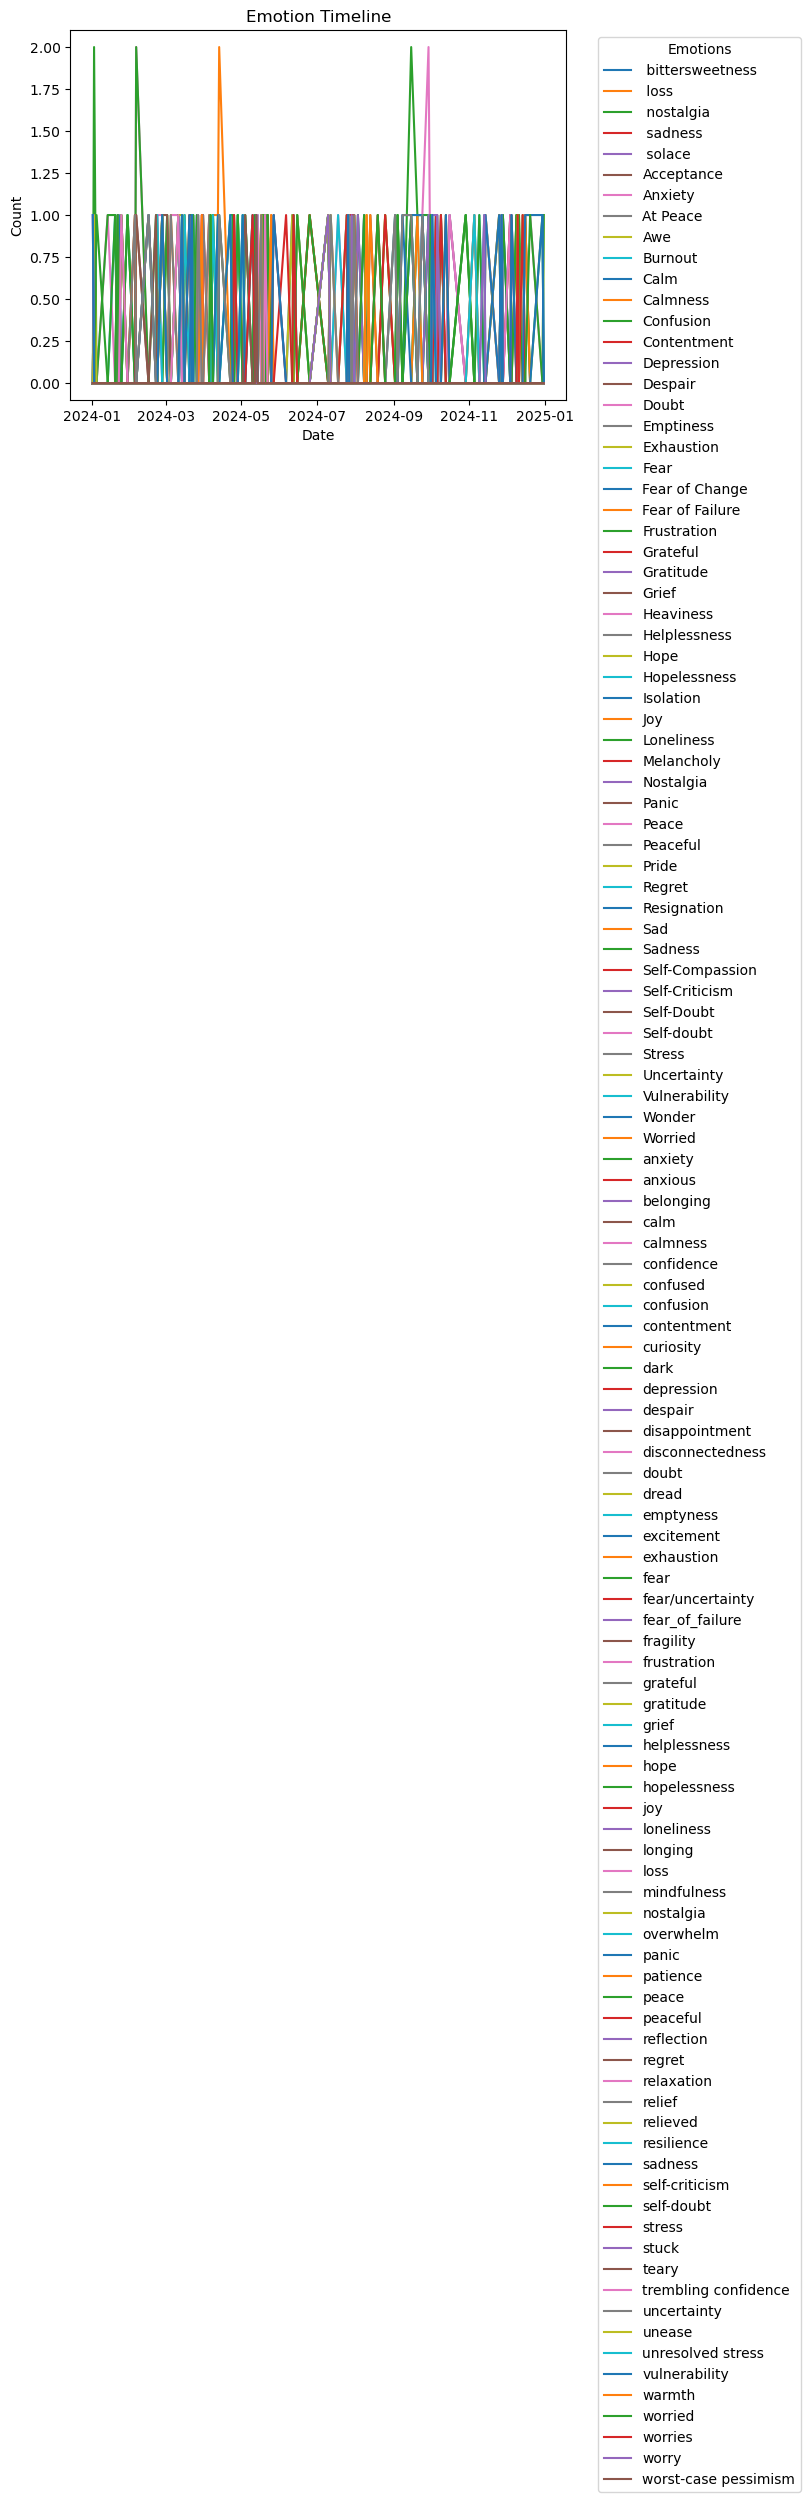

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load and flatten the JSONL
path = "/Users/Additional Storage/ML Projects/Journal app/data/test_generated_entries.jsonl"
entries = []

with open(path) as f:
    for line in f:
        entry = json.loads(line)
        analysis = entry.get("analysis", {})
        entry["emotions"] = analysis.get("emotions", [])
        entry["timestamp"] = pd.to_datetime(entry.get("timestamp"))
        entries.append(entry)

df = pd.DataFrame(entries)

# Check if 'emotions' column is there and has values
print(df[["timestamp", "emotions"]].head())

# Explode and group
df_exploded = df[["timestamp", "emotions"]].explode("emotions")
df_exploded["date"] = df_exploded["timestamp"].dt.date

emotion_counts = df_exploded.groupby(["date", "emotions"]).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
emotion_counts.plot()
plt.title("Emotion Timeline")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [72]:
import json
import pandas as pd
from app.visualizations import plot_emotion_timeline123

# Load data
path = "/Users/Additional Storage/ML Projects/Journal app/data/test_generated_entries.jsonl"
entries = []

with open(path) as f:
    for line in f:
        entry = json.loads(line)
        entry["timestamp"] = pd.to_datetime(entry.get("timestamp"))
        entries.append(entry)

df = pd.DataFrame(entries)

# Call the function
plot_emotion_timeline(df)


ImportError: cannot import name 'plot_emotion_timeline123' from 'app.visualizations' (/Users/Additional Storage/ML Projects/Journal app/notebooks/../app/visualizations.py)

In [74]:
!pip install wordcloud
